In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [406]:
train_x = pd.read_csv('Final_Dataset/x_train_new.csv')
train_y = pd.read_csv('Final_Dataset/y_train_new.csv')
valid_x = pd.read_csv('Final_Dataset/x_valid_new.csv')
valid_y = pd.read_csv('Final_Dataset/y_valid_new.csv')
test_x = pd.read_csv('Final_Dataset/x_test_new.csv')
test_y = pd.read_csv('Final_Dataset/y_test_new.csv')

In [407]:
random_seed=1

In [408]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('PotentialFraud', 1)]


In [409]:
train_array_x = X_resampled.to_numpy()
train_array_y = y_resampled.to_numpy()
valid_array_x = valid_x.to_numpy()
valid_array_y = valid_y.to_numpy()
array_x = np.concatenate([train_array_x,valid_array_x],axis=0)
array_y = np.concatenate([train_array_y,valid_array_y],axis=0)
test_fold = np.concatenate([np.array(train_array_x.shape[0]*[-1,]),np.array(valid_array_x.shape[0]*[0,])],axis=0)

In [410]:
from sklearn.model_selection import PredefinedSplit

In [411]:
ps = PredefinedSplit(test_fold=test_fold)

# Decision Tree

In [250]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [251]:
from sklearn.metrics import precision_score,recall_score,ConfusionMatrixDisplay,confusion_matrix,f1_score

In [252]:
from sklearn.model_selection import GridSearchCV

## Selection Based on F1 Scores

In [253]:
tree = DecisionTreeClassifier(random_state=random_seed)
tree_grid = GridSearchCV(tree,param_grid={'max_depth':[3,10,20,50],'min_samples_leaf':[2,6,10,20],
                                          'max_features':[None,'sqrt','log2',5,10,20]},
                        scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
tree_grid.fit(array_x,array_y)

Fitting 1 folds for each of 96 candidates, totalling 96 fits
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2; accuracy: (test=0.832) f1: (test=0.435) precision: (test=0.289) recall: (test=0.875) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=6; accuracy: (test=0.832) f1: (test=0.435) precision: (test=0.289) recall: (test=0.875) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10; accuracy: (test=0.832) f1: (test=0.435) precision: (test=0.289) recall: (test=0.875) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20; accuracy: (test=0.832) f1: (test=0.435) precision: (test=0.289) recall: (test=0.875) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=2; accuracy: (test=0.865) f1: (test=0.467) precision: (test=0.330) recall: (test=0.800) total time=   0.0s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6; accuracy: (test=0.865) f1: 

[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=6; accuracy: (test=0.904) f1: (test=0.490) precision: (test=0.403) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10; accuracy: (test=0.885) f1: (test=0.415) precision: (test=0.333) recall: (test=0.550) total time=   0.2s
[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20; accuracy: (test=0.869) f1: (test=0.413) precision: (test=0.309) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=2; accuracy: (test=0.884) f1: (test=0.388) precision: (test=0.317) recall: (test=0.500) total time=   0.0s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6; accuracy: (test=0.865) f1: (test=0.354) precision: (test=0.274) recall: (test=0.500) total time=   0.0s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10; accuracy: (test=0.885) f1: (test=0.446) precision: (test=0.347) recall: (test=0.6

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20, 50],
                         'max_features': [None, 'sqrt', 'log2', 5, 10, 20],
                         'min_samples_leaf': [2, 6, 10, 20]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [254]:
tree_resampled = tree_grid.best_estimator_

In [255]:
f1_score(y_resampled,tree_resampled.predict(X_resampled))

0.9620025673940951

In [256]:
f1_score(test_y,tree_resampled.predict(test_x))

0.5396825396825397

In [257]:
tree_resampled

DecisionTreeClassifier(max_depth=50, max_features=20, min_samples_leaf=6,
                       random_state=1)

Accuracy Score

In [258]:
tree_resampled.score(X_resampled,y_resampled)

0.9622063329928499

In [259]:
tree_resampled.score(test_x,test_y)

0.8927911275415896

Recall Score

In [260]:
recall_score(y_resampled,tree_resampled.predict(X_resampled))

0.9568437180796732

In [261]:
recall_score(test_y,tree_resampled.predict(test_x))

0.6296296296296297

Precision Score

In [262]:
precision_score(y_resampled,tree_resampled.predict(X_resampled))

0.9672173464119773

In [263]:
precision_score(test_y,tree_resampled.predict(test_x))

0.4722222222222222

In [264]:
pd.Series(tree_resampled.predict(test_x)).value_counts()

0.0    469
1.0     72
dtype: int64

In [215]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [216]:
from sklearn.metrics import roc_auc_score

In [217]:
roc_auc_score(y_resampled,tree_resampled.predict(X_resampled))

0.9827630234933605

In [218]:
roc_auc_score(test_y,tree_resampled.predict(test_x))

0.7573009354323522

# Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Selection Based on F1 Scores

In [219]:
lr = LogisticRegression(random_state=1)
lr_grid = GridSearchCV(lr,param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                                       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                       'max_iter':[5,10,20,50,100]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
lr_grid.fit(array_x,array_y)

Fitting 1 folds for each of 100 candidates, totalling 100 fits
[CV 1/1] END max_iter=5, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=liblinear; accuracy: (test=0.841) f1: (test=0.386) precision: (test=0.270) recall: (test=0.675) total time=   0.1s
[CV 1/1] END max_iter=5, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=saga; accuracy: (test=0.826) f1: (test=0.347) precision: (test=0.240) recall: (test=0.625) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l2, solver=newton-cg; accuracy: (test=0.872) f1: (test=0.410) precision: (test=0.312) recall: (test=0.600) total time=   0.0s
[CV 1/1] END max_iter=

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Libr

[CV 1/1] END max_iter=5, penalty=l2, solver=liblinear; accuracy: (test=0.848) f1: (test=0.359) precision: (test=0.261) recall: (test=0.575) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l2, solver=sag; accuracy: (test=0.848) f1: (test=0.359) precision: (test=0.261) recall: (test=0.575) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l2, solver=saga; accuracy: (test=0.826) f1: (test=0.347) precision: (test=0.240) recall: (test=0.625) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=elasticnet, solver=sag; accu

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these

[CV 1/1] END max_iter=5, penalty=none, solver=saga; accuracy: (test=0.826) f1: (test=0.347) precision: (test=0.240) recall: (test=0.625) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l1, solver=liblinear; accuracy: (test=0.860) f1: (test=0.433) precision: (test=0.309) recall: (test=0.725) total time=   0.1s
[CV 1/1] END max_iter=10, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/p

[CV 1/1] END max_iter=10, penalty=l1, solver=saga; accuracy: (test=0.847) f1: (test=0.357) precision: (test=0.258) recall: (test=0.575) total time=   0.1s
[CV 1/1] END max_iter=10, penalty=l2, solver=newton-cg; accuracy: (test=0.861) f1: (test=0.419) precision: (test=0.303) recall: (test=0.675) total time=   0.1s
[CV 1/1] END max_iter=10, penalty=l2, solver=lbfgs; accuracy: (test=0.884) f1: (test=0.432) precision: (test=0.338) recall: (test=0.600) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l2, solver=liblinear; accuracy: (test=0.872) f1: (test=0.448) precision: (test=0.329) recall: (test=0.700) total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[CV 1/1] END max_iter=10, penalty=l2, solver=sag; accuracy: (test=0.867) f1: (test=0.390) precision: (test=0.295) recall: (test=0.575) total time=   0.1s
[CV 1/1] END max_iter=10, penalty=l2, solver=saga; accuracy: (test=0.847) f1: (test=0.357) precision: (test=0.258) recall: (test=0.575) total time=   0.1s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=saga; ac

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV 1/1] END max_iter=10, penalty=none, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=none, solver=sag; accuracy: (test=0.867) f1: (test=0.390) precision: (test=0.295) recall: (test=0.575) total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these

[CV 1/1] END max_iter=10, penalty=none, solver=saga; accuracy: (test=0.847) f1: (test=0.357) precision: (test=0.258) recall: (test=0.575) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/p

[CV 1/1] END max_iter=20, penalty=l1, solver=liblinear; accuracy: (test=0.861) f1: (test=0.436) precision: (test=0.312) recall: (test=0.725) total time=   2.5s
[CV 1/1] END max_iter=20, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=l1, solver=saga; accuracy: (test=0.863) f1: (test=0.393) precision: (test=0.293) recall: (test=0.600) total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV 1/1] END max_iter=20, penalty=l2, solver=newton-cg; accuracy: (test=0.860) f1: (test=0.441) precision: (test=0.312) recall: (test=0.750) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=l2, solver=lbfgs; accuracy: (test=0.865) f1: (test=0.425) precision: (test=0.310) recall: (test=0.675) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=l2, solver=liblinear; accuracy: (test=0.860) f1: (test=0.449) precision: (test=0.316) recall: (test=0.775) total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these

[CV 1/1] END max_iter=20, penalty=l2, solver=sag; accuracy: (test=0.861) f1: (test=0.380) precision: (test=0.284) recall: (test=0.575) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=l2, solver=saga; accuracy: (test=0.863) f1: (test=0.393) precision: (test=0.293) recall: (test=0.600) total time=   0.2s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=saga; ac

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV 1/1] END max_iter=20, penalty=none, solver=newton-cg; accuracy: (test=0.860) f1: (test=0.441) precision: (test=0.312) recall: (test=0.750) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=none, solver=lbfgs; accuracy: (test=0.865) f1: (test=0.425) precision: (test=0.310) recall: (test=0.675) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=none, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=none, solver=sag; accuracy: (test=0.861) f1: (test=0.380) precision: (test=0.284) recall: (test=0.575) total time=   0.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3

[CV 1/1] END max_iter=20, penalty=none, solver=saga; accuracy: (test=0.863) f1: (test=0.393) precision: (test=0.293) recall: (test=0.600) total time=   0.1s
[CV 1/1] END max_iter=50, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=liblinear; accuracy: (test=0.863) f1: (test=0.439) precision: (test=0.315) recall: (test=0.725) total time=   4.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Fr

[CV 1/1] END max_iter=50, penalty=l1, solver=saga; accuracy: (test=0.858) f1: (test=0.364) precision: (test=0.272) recall: (test=0.550) total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV 1/1] END max_iter=50, penalty=l2, solver=newton-cg; accuracy: (test=0.856) f1: (test=0.426) precision: (test=0.302) recall: (test=0.725) total time=   0.9s
[CV 1/1] END max_iter=50, penalty=l2, solver=lbfgs; accuracy: (test=0.845) f1: (test=0.425) precision: (test=0.292) recall: (test=0.775) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l2, solver=liblinear; accuracy: (test=0.863) f1: (test=0.439) precision: (test=0.315) recall: (test=0.725) total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END max_iter=50, penalty=l2, solver=sag; accuracy: (test=0.871) f1: (test=0.417) precision: (test=0.312) recall: (test=0.625) total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3

[CV 1/1] END max_iter=50, penalty=l2, solver=saga; accuracy: (test=0.858) f1: (test=0.364) precision: (test=0.272) recall: (test=0.550) total time=   0.3s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=saga; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

[CV 1/1] END max_iter=50, penalty=none, solver=newton-cg; accuracy: (test=0.854) f1: (test=0.423) precision: (test=0.299) recall: (test=0.725) total time=   0.7s
[CV 1/1] END max_iter=50, penalty=none, solver=lbfgs; accuracy: (test=0.845) f1: (test=0.425) precision: (test=0.292) recall: (test=0.775) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=none, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END max_iter=50, penalty=none, solver=sag; accuracy: (test=0.871) f1: (test=0.417) precision: (test=0.312) recall: (test=0.625) total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3

[CV 1/1] END max_iter=50, penalty=none, solver=saga; accuracy: (test=0.858) f1: (test=0.364) precision: (test=0.272) recall: (test=0.550) total time=   0.3s
[CV 1/1] END max_iter=100, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=l1, solver=liblinear; accuracy: (test=0.863) f1: (test=0.439) precision: (test=0.315) recall: (test=0.725) total time=   3.6s
[CV 1/1] END max_iter=100, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Library/Fr

[CV 1/1] END max_iter=100, penalty=l1, solver=saga; accuracy: (test=0.871) f1: (test=0.417) precision: (test=0.312) recall: (test=0.625) total time=   0.8s
[CV 1/1] END max_iter=100, penalty=l2, solver=newton-cg; accuracy: (test=0.856) f1: (test=0.426) precision: (test=0.302) recall: (test=0.725) total time=   1.0s
[CV 1/1] END max_iter=100, penalty=l2, solver=lbfgs; accuracy: (test=0.850) f1: (test=0.434) precision: (test=0.301) recall: (test=0.775) total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A colum

[CV 1/1] END max_iter=100, penalty=l2, solver=liblinear; accuracy: (test=0.863) f1: (test=0.439) precision: (test=0.315) recall: (test=0.725) total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END max_iter=100, penalty=l2, solver=sag; accuracy: (test=0.876) f1: (test=0.446) precision: (test=0.333) recall: (test=0.675) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3

[CV 1/1] END max_iter=100, penalty=l2, solver=saga; accuracy: (test=0.871) f1: (test=0.417) precision: (test=0.312) recall: (test=0.625) total time=   0.7s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=saga; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=none, solver=newton

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: 

[CV 1/1] END max_iter=100, penalty=none, solver=sag; accuracy: (test=0.876) f1: (test=0.446) precision: (test=0.333) recall: (test=0.675) total time=   0.7s
[CV 1/1] END max_iter=100, penalty=none, solver=saga; accuracy: (test=0.871) f1: (test=0.417) precision: (test=0.312) recall: (test=0.625) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.84103512        nan 0.82624769 0.87245841
 0.82255083 0.84842884 0.84842884 0.82624769        nan        nan
        nan        nan        nan 0.87245841 0.82255083        nan
 0.84842884 0.82624769        nan        nan 0.85951941        nan
 0.84658041 0.86136784 0.88354898 0.87245841 0.86691312 0.84658041
        nan        nan        nan        nan        nan 0.86136784
 0.88354898        nan 0.86691312 0.84658041        nan        nan
 0.86136784        nan 0.86321627 0.85951941 0.8650647  0.85951941
 0.86136784 0.86321627        nan     

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [5, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [220]:
lr_resampled = lr_grid.best_estimator_

In [221]:
f1_score(y_resampled,lr_resampled.predict(X_resampled))

0.842048662454631

In [222]:
f1_score(test_y,lr_resampled.predict(test_x))

0.5751633986928105

In [223]:
lr_resampled

LogisticRegression(max_iter=20, random_state=1, solver='liblinear')

Accuracy Score

In [224]:
lr_resampled = lr_grid.best_estimator_
lr_resampled.score(X_resampled,y_resampled)

0.8499744637385087

In [225]:
lr_resampled.score(test_x,test_y)

0.8798521256931608

Recall Score

In [235]:
recall_score(y_resampled,lr_resampled.predict(X_resampled))

0.7997957099080695

In [236]:
recall_score(test_y,lr_resampled.predict(test_x))

0.8148148148148148

Precision Score

In [237]:
precision_score(y_resampled,lr_resampled.predict(X_resampled))

0.8890150439965938

In [238]:
precision_score(test_y,lr_resampled.predict(test_x))

0.4444444444444444

In [239]:
pd.Series(lr_resampled.predict(test_x)).value_counts()

0.0    442
1.0     99
dtype: int64

In [240]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [232]:
roc_auc_score(y_resampled,lr_resampled.predict(X_resampled))

0.8499744637385087

In [233]:
roc_auc_score(test_y,lr_resampled.predict(test_x))

0.8509392349228079

<Figure size 1440x720 with 0 Axes>

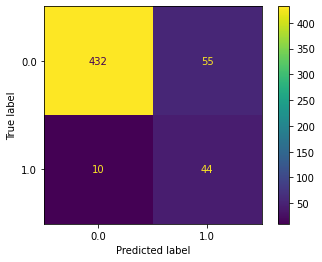

In [234]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,lr_resampled.predict(test_x),labels=lr_resampled.classes_),display_labels=lr_resampled.classes_)
cm.plot()
plt.show()

# XGB

In [301]:
from xgboost import XGBClassifier

In [412]:
xgb = XGBClassifier(random_state=1)
xgb_grid = GridSearchCV(xgb,param_grid = {'n_estimators':[50,100,300],
                                       'max_depth':[3,10],'min_child_weight':[0.01,0.1,0.2,0.5],
                                         'eta':[0.01,0.1,0.2,0.5]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
xgb_grid.fit(array_x,array_y)

Fitting 1 folds for each of 96 candidates, totalling 96 fits
[14:10:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.832) f1: (test=0.435) precision: (test=0.289) recall: (test=0.875) total time=   0.6s
[14:10:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.841) f1: (test=0.449) precision: (test=0.302) recall: (test=0.875) total time=   0.8s
[14:10:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.861) f1: (test=0.460) precision: (test=0.323) recall: (test=0.800) total time=   2.5s
[14:10:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.832) f1: (test=0.435) precision: (test=0.289) recall: (test=0.875) total time=   0.4s
[14:10:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.841) f1: (test=0.449) precision: (test=0.302) recall: (test=0.875) total time=   0.8s
[14:10:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.861) f1: (test=0.460) precision: (test=0.323) recall: (test=0.800) total time=   2.7s
[14:10:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.832) f1: (test=0.435) precision: (test=0.289) recall: (test=0.875) total time=   0.5s
[14:10:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.841) f1: (test=0.449) precision: (test=0.302) recall: (test=0.875) total time=   0.8s
[14:10:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.861) f1: (test=0.460) precision: (test=0.323) recall: (test=0.800) total time=   2.5s
[14:10:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.832) f1: (test=0.435) precision: (test=0.289) recall: (test=0.875) total time=   0.5s
[14:10:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.841) f1: (test=0.449) precision: (test=0.302) recall: (test=0.875) total time=   0.9s
[14:10:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.861) f1: (test=0.460) precision: (test=0.323) recall: (test=0.800) total time=   2.4s
[14:10:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.889) f1: (test=0.444) precision: (test=0.353) recall: (test=0.600) total time=   1.7s
[14:10:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.887) f1: (test=0.430) precision: (test=0.343) recall: (test=0.575) total time=   3.2s
[14:10:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.898) f1: (test=0.466) precision: (test=0.381) recall: (test=0.600) total time=  10.3s
[14:10:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.889) f1: (test=0.444) precision: (test=0.353) recall: (test=0.600) total time=   1.6s
[14:10:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.887) f1: (test=0.430) precision: (test=0.343) recall: (test=0.575) total time=   3.4s
[14:10:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.900) f1: (test=0.471) precision: (test=0.387) recall: (test=0.600) total time=  10.5s
[14:10:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.889) f1: (test=0.444) precision: (test=0.353) recall: (test=0.600) total time=   1.6s
[14:10:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.887) f1: (test=0.430) precision: (test=0.343) recall: (test=0.575) total time=   3.3s
[14:11:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.896) f1: (test=0.472) precision: (test=0.379) recall: (test=0.625) total time=   9.8s
[14:11:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.891) f1: (test=0.459) precision: (test=0.362) recall: (test=0.625) total time=   1.8s
[14:11:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.898) f1: (test=0.476) precision: (test=0.385) recall: (test=0.625) total time=   3.2s
[14:11:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.900) f1: (test=0.481) precision: (test=0.391) recall: (test=0.625) total time=   9.5s
[14:11:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.876) f1: (test=0.481) precision: (test=0.348) recall: (test=0.775) total time=   0.4s
[14:11:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=   0.8s
[14:11:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.900) f1: (test=0.509) precision: (test=0.400) recall: (test=0.700) total time=   2.7s
[14:11:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.876) f1: (test=0.481) precision: (test=0.348) recall: (test=0.775) total time=   0.5s
[14:11:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=   0.9s
[14:11:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.908) f1: (test=0.537) precision: (test=0.426) recall: (test=0.725) total time=   2.5s
[14:11:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.876) f1: (test=0.481) precision: (test=0.348) recall: (test=0.775) total time=   0.4s
[14:11:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=   0.9s
[14:11:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.904) f1: (test=0.519) precision: (test=0.412) recall: (test=0.700) total time=   2.7s
[14:11:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.876) f1: (test=0.481) precision: (test=0.348) recall: (test=0.775) total time=   0.5s
[14:11:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=   0.9s
[14:11:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.902) f1: (test=0.495) precision: (test=0.400) recall: (test=0.650) total time=   2.7s
[14:11:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.891) f1: (test=0.392) precision: (test=0.333) recall: (test=0.475) total time=   1.9s
[14:11:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.898) f1: (test=0.421) precision: (test=0.364) recall: (test=0.500) total time=   3.8s
[14:11:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.908) f1: (test=0.444) precision: (test=0.400) recall: (test=0.500) total time=  10.8s
[14:11:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.896) f1: (test=0.429) precision: (test=0.362) recall: (test=0.525) total time=   1.8s
[14:11:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.902) f1: (test=0.454) precision: (test=0.386) recall: (test=0.550) total time=   3.2s
[14:12:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.911) f1: (test=0.478) precision: (test=0.423) recall: (test=0.550) total time=   8.7s
[14:12:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.896) f1: (test=0.451) precision: (test=0.371) recall: (test=0.575) total time=   2.5s
[14:12:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.902) f1: (test=0.465) precision: (test=0.390) recall: (test=0.575) total time=   3.5s
[14:12:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.908) f1: (test=0.444) precision: (test=0.400) recall: (test=0.500) total time=   8.1s
[14:12:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.900) f1: (test=0.471) precision: (test=0.387) recall: (test=0.600) total time=   1.8s
[14:12:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.908) f1: (test=0.468) precision: (test=0.407) recall: (test=0.550) total time=   3.1s
[14:12:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.908) f1: (test=0.457) precision: (test=0.404) recall: (test=0.525) total time=   7.2s
[14:12:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   0.5s
[14:12:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.906) f1: (test=0.541) precision: (test=0.423) recall: (test=0.750) total time=   0.9s
[14:12:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.904) f1: (test=0.509) precision: (test=0.409) recall: (test=0.675) total time=   2.8s
[14:12:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   0.5s
[14:12:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.906) f1: (test=0.541) precision: (test=0.423) recall: (test=0.750) total time=   0.9s
[14:12:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.902) f1: (test=0.495) precision: (test=0.400) recall: (test=0.650) total time=   2.7s
[14:12:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.884) f1: (test=0.496) precision: (test=0.365) recall: (test=0.775) total time=   0.5s
[14:12:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.911) f1: (test=0.556) precision: (test=0.441) recall: (test=0.750) total time=   0.9s
[14:12:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.906) f1: (test=0.532) precision: (test=0.420) recall: (test=0.725) total time=   3.0s
[14:12:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   0.5s
[14:12:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.889) f1: (test=0.483) precision: (test=0.368) recall: (test=0.700) total time=   0.9s
[14:12:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.898) f1: (test=0.476) precision: (test=0.385) recall: (test=0.625) total time=   2.8s
[14:12:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.900) f1: (test=0.449) precision: (test=0.379) recall: (test=0.550) total time=   1.9s
[14:12:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.902) f1: (test=0.430) precision: (test=0.377) recall: (test=0.500) total time=   3.7s
[14:12:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.906) f1: (test=0.452) precision: (test=0.396) recall: (test=0.525) total time=   9.5s
[14:13:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.909) f1: (test=0.495) precision: (test=0.421) recall: (test=0.600) total time=   1.7s
[14:13:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=   3.0s
[14:13:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.908) f1: (test=0.457) precision: (test=0.404) recall: (test=0.525) total time=   7.2s
[14:13:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.909) f1: (test=0.462) precision: (test=0.412) recall: (test=0.525) total time=   1.9s
[14:13:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.906) f1: (test=0.427) precision: (test=0.388) recall: (test=0.475) total time=   2.9s
[14:13:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.909) f1: (test=0.462) precision: (test=0.412) recall: (test=0.525) total time=   6.2s
[14:13:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.906) f1: (test=0.485) precision: (test=0.407) recall: (test=0.600) total time=   1.5s
[14:13:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.909) f1: (test=0.495) precision: (test=0.421) recall: (test=0.600) total time=   2.6s
[14:13:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.904) f1: (test=0.447) precision: (test=0.389) recall: (test=0.525) total time=   5.4s
[14:13:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.902) f1: (test=0.514) precision: (test=0.406) recall: (test=0.700) total time=   0.5s
[14:13:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.911) f1: (test=0.500) precision: (test=0.429) recall: (test=0.600) total time=   0.9s
[14:13:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.909) f1: (test=0.484) precision: (test=0.418) recall: (test=0.575) total time=   2.6s
[14:13:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.902) f1: (test=0.514) precision: (test=0.406) recall: (test=0.700) total time=   0.4s
[14:13:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.911) f1: (test=0.500) precision: (test=0.429) recall: (test=0.600) total time=   0.9s
[14:13:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.913) f1: (test=0.484) precision: (test=0.431) recall: (test=0.550) total time=   2.5s
[14:13:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.902) f1: (test=0.514) precision: (test=0.406) recall: (test=0.700) total time=   0.4s
[14:13:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.896) f1: (test=0.472) precision: (test=0.379) recall: (test=0.625) total time=   0.9s
[14:13:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.906) f1: (test=0.495) precision: (test=0.410) recall: (test=0.625) total time=   2.5s
[14:13:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.895) f1: (test=0.486) precision: (test=0.380) recall: (test=0.675) total time=   0.4s
[14:13:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.898) f1: (test=0.495) precision: (test=0.391) recall: (test=0.675) total time=   0.9s
[14:13:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.902) f1: (test=0.475) precision: (test=0.393) recall: (test=0.600) total time=   2.5s
[14:13:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.911) f1: (test=0.478) precision: (test=0.423) recall: (test=0.550) total time=   1.8s
[14:13:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.915) f1: (test=0.489) precision: (test=0.440) recall: (test=0.550) total time=   3.2s
[14:14:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.913) f1: (test=0.472) precision: (test=0.429) recall: (test=0.525) total time=   7.8s
[14:14:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.911) f1: (test=0.489) precision: (test=0.426) recall: (test=0.575) total time=   1.9s
[14:14:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.909) f1: (test=0.473) precision: (test=0.415) recall: (test=0.550) total time=   2.3s
[14:14:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.911) f1: (test=0.478) precision: (test=0.423) recall: (test=0.550) total time=   6.5s
[14:14:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.915) f1: (test=0.500) precision: (test=0.442) recall: (test=0.575) total time=   1.7s
[14:14:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.913) f1: (test=0.495) precision: (test=0.434) recall: (test=0.575) total time=   2.6s
[14:14:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.909) f1: (test=0.462) precision: (test=0.412) recall: (test=0.525) total time=   5.2s
[14:14:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.908) f1: (test=0.468) precision: (test=0.407) recall: (test=0.550) total time=   1.3s
[14:14:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.906) f1: (test=0.452) precision: (test=0.396) recall: (test=0.525) total time=   2.0s
[14:14:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=   3.8s
[14:14:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_we...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                       

F1 Score

In [413]:
xgb_resampled = xgb_grid.best_estimator_

In [414]:
f1_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9657164385281929

In [415]:
f1_score(test_y,xgb_resampled.predict(test_x))

0.6050420168067226

In [416]:
xgb_resampled

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.200000003,
              max_delta_step=0, max_depth=3, min_child_weight=0.2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy Score

In [417]:
xgb_resampled = xgb_grid.best_estimator_
xgb_resampled.score(X_resampled,y_resampled)

0.9651430030643514

In [418]:
xgb_resampled.score(test_x,test_y)

0.9131238447319778

Recall Score

In [419]:
recall_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9818692543411645

In [420]:
recall_score(test_y,xgb_resampled.predict(test_x))

0.6666666666666666

Precision Score

In [421]:
precision_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9500864838151717

In [422]:
precision_score(test_y,xgb_resampled.predict(test_x))

0.5538461538461539

In [423]:
pd.Series(xgb_resampled.predict(test_x)).value_counts()

0.0    476
1.0     65
dtype: int64

In [424]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [425]:
from sklearn.metrics import roc_auc_score

In [426]:
roc_auc_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9651430030643513

In [427]:
roc_auc_score(test_y,xgb_resampled.predict(test_x))

0.8035592060232716

<Figure size 1440x720 with 0 Axes>

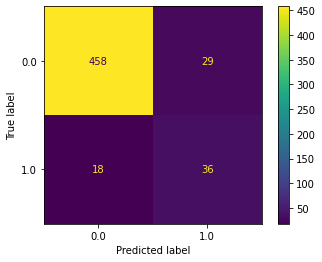

In [428]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,xgb_resampled.predict(test_x),labels=xgb_resampled.classes_),display_labels=xgb_resampled.classes_)
cm.plot()
plt.show()

# Random Forest

## Without Adding Graph Features

In [430]:
from sklearn.ensemble import RandomForestClassifier

In [431]:
rf = RandomForestClassifier(random_state=1)
rf_grid = GridSearchCV(rf,param_grid = {'n_estimators':[50,100,300],
                                       'max_depth':[3,10,20],'min_samples_leaf':[6,10,20],
                                          'max_features':['sqrt','log2',10,20]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
rf_grid.fit(array_x,array_y)

Fitting 1 folds for each of 108 candidates, totalling 108 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.841) f1: (test=0.434) precision: (test=0.295) recall: (test=0.825) total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.841) f1: (test=0.434) precision: (test=0.295) recall: (test=0.825) total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.837) f1: (test=0.429) precision: (test=0.289) recall: (test=0.825) total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.841) f1: (test=0.434) precision: (test=0.295) recall: (test=0.825) total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.832) f1: (test=0.413) precision: (test=0.278) recall: (test=0.800) total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.834) f1: (test=0.416) precision: (test=0.281) recall: (test=0.800) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.837) f1: (test=0.421) precision: (test=0.286) recall: (test=0.800) total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.832) f1: (test=0.413) precision: (test=0.278) recall: (test=0.800) total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.834) f1: (test=0.416) precision: (test=0.281) recall: (test=0.800) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.837) f1: (test=0.421) precision: (test=0.286) recall: (test=0.800) total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.830) f1: (test=0.410) precision: (test=0.276) recall: (test=0.800) total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.834) f1: (test=0.416) precision: (test=0.281) recall: (test=0.800) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.837) f1: (test=0.421) precision: (test=0.286) recall: (test=0.800) total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.832) f1: (test=0.413) precision: (test=0.278) recall: (test=0.800) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.841) f1: (test=0.427) precision: (test=0.291) recall: (test=0.800) total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.835) f1: (test=0.418) precision: (test=0.283) recall: (test=0.800) total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.832) f1: (test=0.413) precision: (test=0.278) recall: (test=0.800) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.841) f1: (test=0.427) precision: (test=0.291) recall: (test=0.800) total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.835) f1: (test=0.418) precision: (test=0.283) recall: (test=0.800) total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.832) f1: (test=0.413) precision: (test=0.278) recall: (test=0.800) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.839) f1: (test=0.424) precision: (test=0.288) recall: (test=0.800) total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.835) f1: (test=0.418) precision: (test=0.283) recall: (test=0.800) total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.834) f1: (test=0.430) precision: (test=0.288) recall: (test=0.850) total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.841) f1: (test=0.442) precision: (test=0.298) recall: (test=0.850) total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.841) f1: (test=0.434) precision: (test=0.295) recall: (test=0.825) total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.834) f1: (test=0.430) precision: (test=0.288) recall: (test=0.850) total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.841) f1: (test=0.442) precision: (test=0.298) recall: (test=0.850) total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.841) f1: (test=0.434) precision: (test=0.295) recall: (test=0.825) total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.835) f1: (test=0.440) precision: (test=0.294) recall: (test=0.875) total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.841) f1: (test=0.442) precision: (test=0.298) recall: (test=0.850) total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.841) f1: (test=0.434) precision: (test=0.295) recall: (test=0.825) total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.891) f1: (test=0.512) precision: (test=0.383) recall: (test=0.775) total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.889) f1: (test=0.492) precision: (test=0.372) recall: (test=0.725) total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.882) f1: (test=0.492) precision: (test=0.360) recall: (test=0.775) total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.887) f1: (test=0.512) precision: (test=0.376) recall: (test=0.800) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.882) f1: (test=0.492) precision: (test=0.360) recall: (test=0.775) total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.882) f1: (test=0.492) precision: (test=0.360) recall: (test=0.775) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.880) f1: (test=0.496) precision: (test=0.360) recall: (test=0.800) total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.896) f1: (test=0.533) precision: (test=0.400) recall: (test=0.800) total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.889) f1: (test=0.500) precision: (test=0.375) recall: (test=0.750) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.889) f1: (test=0.516) precision: (test=0.381) recall: (test=0.800) total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.500) precision: (test=0.369) recall: (test=0.775) total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.880) f1: (test=0.488) precision: (test=0.356) recall: (test=0.775) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.880) f1: (test=0.488) precision: (test=0.356) recall: (test=0.775) total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.880) f1: (test=0.504) precision: (test=0.363) recall: (test=0.825) total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.898) f1: (test=0.530) precision: (test=0.403) recall: (test=0.775) total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.898) f1: (test=0.530) precision: (test=0.403) recall: (test=0.775) total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.895) f1: (test=0.513) precision: (test=0.390) recall: (test=0.750) total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.891) f1: (test=0.520) precision: (test=0.386) recall: (test=0.800) total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.891) f1: (test=0.520) precision: (test=0.386) recall: (test=0.800) total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.891) f1: (test=0.504) precision: (test=0.380) recall: (test=0.750) total time=   8.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.889) f1: (test=0.516) precision: (test=0.381) recall: (test=0.800) total time=   8.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.893) f1: (test=0.491) precision: (test=0.378) recall: (test=0.700) total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.896) f1: (test=0.509) precision: (test=0.392) recall: (test=0.725) total time=  17.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.889) f1: (test=0.483) precision: (test=0.368) recall: (test=0.700) total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=  16.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.889) f1: (test=0.508) precision: (test=0.378) recall: (test=0.775) total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=  16.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.898) f1: (test=0.495) precision: (test=0.391) recall: (test=0.675) total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.896) f1: (test=0.491) precision: (test=0.386) recall: (test=0.675) total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.891) f1: (test=0.459) precision: (test=0.362) recall: (test=0.625) total time=   6.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.885) f1: (test=0.475) precision: (test=0.359) recall: (test=0.700) total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.889) f1: (test=0.492) precision: (test=0.372) recall: (test=0.725) total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.891) f1: (test=0.504) precision: (test=0.380) recall: (test=0.750) total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.885) f1: (test=0.516) precision: (test=0.375) recall: (test=0.825) total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.885) f1: (test=0.508) precision: (test=0.372) recall: (test=0.800) total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.882) f1: (test=0.500) precision: (test=0.364) recall: (test=0.800) total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.898) f1: (test=0.495) precision: (test=0.391) recall: (test=0.675) total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.896) f1: (test=0.500) precision: (test=0.389) recall: (test=0.700) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.891) f1: (test=0.478) precision: (test=0.370) recall: (test=0.675) total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.885) f1: (test=0.483) precision: (test=0.362) recall: (test=0.725) total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.885) f1: (test=0.483) precision: (test=0.362) recall: (test=0.725) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.882) f1: (test=0.492) precision: (test=0.360) recall: (test=0.775) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.885) f1: (test=0.500) precision: (test=0.369) recall: (test=0.775) total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.884) f1: (test=0.512) precision: (test=0.371) recall: (test=0.825) total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.891) f1: (test=0.487) precision: (test=0.373) recall: (test=0.700) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.895) f1: (test=0.496) precision: (test=0.384) recall: (test=0.700) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.906) f1: (test=0.541) precision: (test=0.423) recall: (test=0.750) total time=  11.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.900) f1: (test=0.534) precision: (test=0.408) recall: (test=0.775) total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.896) f1: (test=0.525) precision: (test=0.397) recall: (test=0.775) total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   9.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.896) f1: (test=0.500) precision: (test=0.389) recall: (test=0.700) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.902) f1: (test=0.514) precision: (test=0.406) recall: (test=0.700) total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.898) f1: (test=0.505) precision: (test=0.394) recall: (test=0.700) total time=  21.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.895) f1: (test=0.513) precision: (test=0.390) recall: (test=0.750) total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.891) f1: (test=0.487) precision: (test=0.373) recall: (test=0.700) total time=   6.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.896) f1: (test=0.517) precision: (test=0.395) recall: (test=0.750) total time=  20.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.885) f1: (test=0.500) precision: (test=0.369) recall: (test=0.775) total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.889) f1: (test=0.508) precision: (test=0.378) recall: (test=0.775) total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.891) f1: (test=0.512) precision: (test=0.383) recall: (test=0.775) total time=  17.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20],
                         'max_features': ['sqrt', 'log2', 10, 20],
                         'min_samples_leaf': [6, 10, 20],
                         'n_estimators': [50, 100, 300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [286]:
rf_resampled = rf_grid.best_estimator_

In [287]:
f1_score(y_resampled,rf_resampled.predict(X_resampled))

0.9681239763134686

In [288]:
f1_score(test_y,rf_resampled.predict(test_x))

0.6315789473684209

In [289]:
rf_resampled

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=10,
                       n_estimators=50, random_state=1)

Accuracy Score

In [290]:
rf_resampled = rf_grid.best_estimator_
rf_resampled.score(X_resampled,y_resampled)

0.9676966292134831

In [291]:
rf_resampled.score(test_x,test_y)

0.9094269870609981

Recall Score

In [292]:
recall_score(y_resampled,rf_resampled.predict(X_resampled))

0.9811031664964249

In [293]:
recall_score(test_y,rf_resampled.predict(test_x))

0.7777777777777778

Precision Score

In [294]:
precision_score(y_resampled,rf_resampled.predict(X_resampled))

0.9554837105197712

In [295]:
precision_score(test_y,rf_resampled.predict(test_x))

0.5316455696202531

In [296]:
pd.Series(rf_resampled.predict(test_x)).value_counts()

0.0    462
1.0     79
dtype: int64

In [297]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [298]:
from sklearn.metrics import roc_auc_score

In [299]:
roc_auc_score(y_resampled,rf_resampled.predict(X_resampled))

0.9676966292134831

In [300]:
roc_auc_score(test_y,rf_resampled.predict(test_x))

0.850901209217431

<Figure size 1440x720 with 0 Axes>

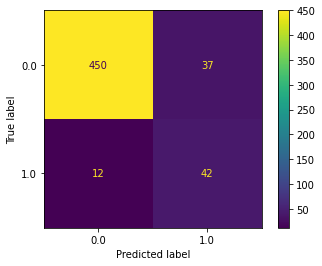

In [282]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,rf_resampled.predict(test_x),labels=rf_resampled.classes_),display_labels=rf_resampled.classes_)
cm.plot()
plt.show()

feature importance on data with graph features

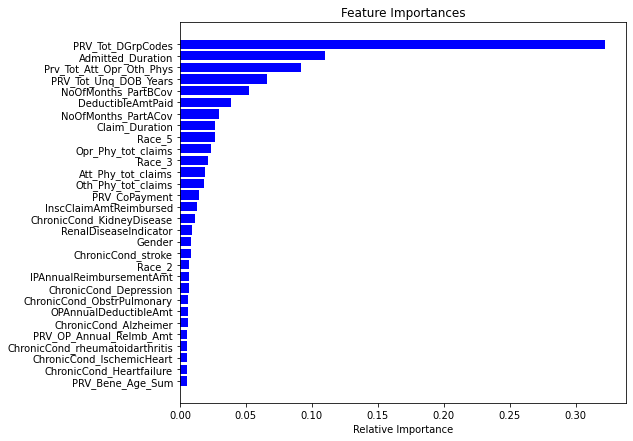

In [283]:
features = train_x.columns
importances = rf_resampled.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## With Graph Features

In [399]:
train_x = pd.concat([train_x,graph_train],axis=1)
valid_x = pd.concat([valid_x,graph_valid],axis=1)
test_x = pd.concat([test_x,graph_test],axis=1)

In [369]:
random_seed=1

In [370]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('PotentialFraud', 1)]


In [371]:
train_array_x = X_resampled.to_numpy()
train_array_y = y_resampled.to_numpy()
valid_array_x = valid_x.to_numpy()
valid_array_y = valid_y.to_numpy()
array_x = np.concatenate([train_array_x,valid_array_x],axis=0)
array_y = np.concatenate([train_array_y,valid_array_y],axis=0)
test_fold = np.concatenate([np.array(train_array_x.shape[0]*[-1,]),np.array(valid_array_x.shape[0]*[0,])],axis=0)

In [372]:
from sklearn.model_selection import PredefinedSplit

In [373]:
ps = PredefinedSplit(test_fold=test_fold)

In [46]:
rf = RandomForestClassifier(random_state=1)
rf_grid = GridSearchCV(rf,param_grid = {'n_estimators':[50,100,300],
                                       'max_depth':[3,10,20],'min_samples_leaf':[2,10,20],
                                          'max_features':['log2',10,20]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
rf_grid.fit(array_x,array_y)

Fitting 1 folds for each of 135 candidates, totalling 135 fits


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=   7.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=  15.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=  31.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=   2.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=   5.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=  17.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.845) f1: (test=0.447) precision: (test=0.304) recall: (test=0.850) total time=   2.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=   5.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.845) f1: (test=0.447) precision: (test=0.304) recall: (test=0.850) total time=  17.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   2.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   1.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.841) f1: (test=0.442) precision: (test=0.298) recall: (test=0.850) total time=   2.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.839) f1: (test=0.439) precision: (test=0.296) recall: (test=0.850) total time=   2.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.841) f1: (test=0.442) precision: (test=0.298) recall: (test=0.850) total time=   2.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.839) f1: (test=0.439) precision: (test=0.296) recall: (test=0.850) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.845) f1: (test=0.440) precision: (test=0.300) recall: (test=0.825) total time=   0.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.845) f1: (test=0.432) precision: (test=0.296) recall: (test=0.800) total time=   1.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.845) f1: (test=0.440) precision: (test=0.300) recall: (test=0.825) total time=   4.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.845) f1: (test=0.440) precision: (test=0.300) recall: (test=0.825) total time=   0.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.845) f1: (test=0.432) precision: (test=0.296) recall: (test=0.800) total time=   1.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.845) f1: (test=0.440) precision: (test=0.300) recall: (test=0.825) total time=  10.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.848) f1: (test=0.453) precision: (test=0.309) recall: (test=0.850) total time=   3.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.847) f1: (test=0.443) precision: (test=0.303) recall: (test=0.825) total time=   5.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.843) f1: (test=0.430) precision: (test=0.294) recall: (test=0.800) total time=  12.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.839) f1: (test=0.424) precision: (test=0.288) recall: (test=0.800) total time=   1.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   2.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   8.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.839) f1: (test=0.424) precision: (test=0.288) recall: (test=0.800) total time=   1.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   2.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   7.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.839) f1: (test=0.424) precision: (test=0.288) recall: (test=0.800) total time=   1.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   2.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   7.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.896) f1: (test=0.481) precision: (test=0.382) recall: (test=0.650) total time=   7.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.900) f1: (test=0.481) precision: (test=0.391) recall: (test=0.625) total time=  16.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.896) f1: (test=0.472) precision: (test=0.379) recall: (test=0.625) total time=  43.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.885) f1: (test=0.475) precision: (test=0.359) recall: (test=0.700) total time=   7.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.885) f1: (test=0.475) precision: (test=0.359) recall: (test=0.700) total time=  14.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.475) precision: (test=0.359) recall: (test=0.700) total time=  41.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.872) f1: (test=0.457) precision: (test=0.333) recall: (test=0.725) total time=   7.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.876) f1: (test=0.472) precision: (test=0.345) recall: (test=0.750) total time=  15.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=  43.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   0.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   2.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   6.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.878) f1: (test=0.476) precision: (test=0.349) recall: (test=0.750) total time=   0.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=   2.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.878) f1: (test=0.484) precision: (test=0.352) recall: (test=0.775) total time=   5.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.869) f1: (test=0.450) precision: (test=0.326) recall: (test=0.725) total time=   0.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.863) f1: (test=0.431) precision: (test=0.311) recall: (test=0.700) total time=   2.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.462) precision: (test=0.333) recall: (test=0.750) total time=   6.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   1.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   1.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   5.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.878) f1: (test=0.476) precision: (test=0.349) recall: (test=0.750) total time=   1.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=   2.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.878) f1: (test=0.484) precision: (test=0.352) recall: (test=0.775) total time=   7.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.869) f1: (test=0.450) precision: (test=0.326) recall: (test=0.725) total time=   0.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.863) f1: (test=0.431) precision: (test=0.311) recall: (test=0.700) total time=   1.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.462) precision: (test=0.333) recall: (test=0.750) total time=   5.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.898) f1: (test=0.495) precision: (test=0.391) recall: (test=0.675) total time=   2.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.895) f1: (test=0.486) precision: (test=0.380) recall: (test=0.675) total time=   4.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.889) f1: (test=0.474) precision: (test=0.365) recall: (test=0.675) total time=  12.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   2.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=   4.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.492) precision: (test=0.366) recall: (test=0.750) total time=  14.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.885) f1: (test=0.508) precision: (test=0.372) recall: (test=0.800) total time=   2.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.885) f1: (test=0.500) precision: (test=0.369) recall: (test=0.775) total time=   4.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.876) f1: (test=0.464) precision: (test=0.341) recall: (test=0.725) total time=  11.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.893) f1: (test=0.473) precision: (test=0.371) recall: (test=0.650) total time=   3.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.895) f1: (test=0.477) precision: (test=0.377) recall: (test=0.650) total time=   7.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.896) f1: (test=0.481) precision: (test=0.382) recall: (test=0.650) total time=  23.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.898) f1: (test=0.513) precision: (test=0.397) recall: (test=0.725) total time=   3.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.895) f1: (test=0.504) precision: (test=0.387) recall: (test=0.725) total time=   7.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.896) f1: (test=0.525) precision: (test=0.397) recall: (test=0.775) total time=  21.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.885) f1: (test=0.492) precision: (test=0.366) recall: (test=0.750) total time=   3.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   6.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.880) f1: (test=0.472) precision: (test=0.349) recall: (test=0.725) total time=  19.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.908) f1: (test=0.479) precision: (test=0.411) recall: (test=0.575) total time=  11.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=  21.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.913) f1: (test=0.472) precision: (test=0.429) recall: (test=0.525) total time= 1.1min


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.895) f1: (test=0.486) precision: (test=0.380) recall: (test=0.675) total time=   9.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.882) f1: (test=0.458) precision: (test=0.346) recall: (test=0.675) total time=  20.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.466) precision: (test=0.355) recall: (test=0.675) total time=  59.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.874) f1: (test=0.460) precision: (test=0.337) recall: (test=0.725) total time=   7.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.876) f1: (test=0.472) precision: (test=0.345) recall: (test=0.750) total time=  16.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=  54.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.900) f1: (test=0.471) precision: (test=0.387) recall: (test=0.600) total time=   1.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.900) f1: (test=0.449) precision: (test=0.379) recall: (test=0.550) total time=   2.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.909) f1: (test=0.484) precision: (test=0.418) recall: (test=0.575) total time=   8.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   1.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   7.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.871) f1: (test=0.470) precision: (test=0.337) recall: (test=0.775) total time=   1.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.867) f1: (test=0.446) precision: (test=0.322) recall: (test=0.725) total time=   2.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.462) precision: (test=0.333) recall: (test=0.750) total time=   6.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.900) f1: (test=0.471) precision: (test=0.387) recall: (test=0.600) total time=   1.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.900) f1: (test=0.449) precision: (test=0.379) recall: (test=0.550) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.909) f1: (test=0.484) precision: (test=0.418) recall: (test=0.575) total time=   8.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   1.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   7.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.871) f1: (test=0.470) precision: (test=0.337) recall: (test=0.775) total time=   1.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.867) f1: (test=0.446) precision: (test=0.322) recall: (test=0.725) total time=   2.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.462) precision: (test=0.333) recall: (test=0.750) total time=   7.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=   2.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.902) f1: (test=0.430) precision: (test=0.377) recall: (test=0.500) total time=   5.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.906) f1: (test=0.440) precision: (test=0.392) recall: (test=0.500) total time=  16.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.891) f1: (test=0.478) precision: (test=0.370) recall: (test=0.675) total time=   2.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.884) f1: (test=0.462) precision: (test=0.351) recall: (test=0.675) total time=   4.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.891) f1: (test=0.504) precision: (test=0.380) recall: (test=0.750) total time=  11.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.882) f1: (test=0.492) precision: (test=0.360) recall: (test=0.775) total time=   1.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.882) f1: (test=0.492) precision: (test=0.360) recall: (test=0.775) total time=   4.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.876) f1: (test=0.464) precision: (test=0.341) recall: (test=0.725) total time=  13.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.913) f1: (test=0.505) precision: (test=0.436) recall: (test=0.600) total time=   5.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=  11.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=  35.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.900) f1: (test=0.518) precision: (test=0.403) recall: (test=0.725) total time=   4.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.898) f1: (test=0.513) precision: (test=0.397) recall: (test=0.725) total time=   9.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.898) f1: (test=0.522) precision: (test=0.400) recall: (test=0.750) total time=  25.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   3.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.885) f1: (test=0.500) precision: (test=0.369) recall: (test=0.775) total time=   6.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=  20.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20],
                         'max_features': [None, 'log2', 5, 10, 20],
                         'min_samples_leaf': [2, 10, 20],
                         'n_estimators': [50, 100, 300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [47]:
rf_resampled = rf_grid.best_estimator_

In [48]:
f1_score(y_resampled,rf_resampled.predict(X_resampled))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9678634195330154

In [49]:
f1_score(test_y,rf_resampled.predict(test_x))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.640625

In [50]:
rf_resampled

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=10,
                       n_estimators=300, random_state=1)

Accuracy Score

In [51]:
rf_resampled = rf_grid.best_estimator_
rf_resampled.score(X_resampled,y_resampled)

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9673135852911133

In [52]:
rf_resampled.score(test_x,test_y)

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9149722735674677

Recall Score

In [53]:
recall_score(y_resampled,rf_resampled.predict(X_resampled))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9844228804902962

In [54]:
recall_score(test_y,rf_resampled.predict(test_x))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7592592592592593

Precision Score

In [55]:
precision_score(y_resampled,rf_resampled.predict(X_resampled))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9518518518518518

In [56]:
precision_score(test_y,rf_resampled.predict(test_x))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.5540540540540541

In [57]:
pd.Series(rf_resampled.predict(test_x)).value_counts()

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.0    467
1.0     74
dtype: int64

In [58]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_resampled,rf_resampled.predict(X_resampled))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9673135852911133

In [61]:
roc_auc_score(test_y,rf_resampled.predict(test_x))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8457487261388699

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

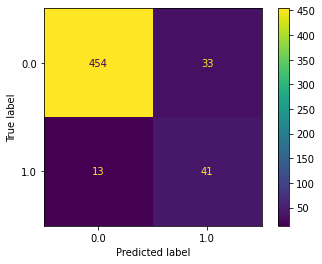

In [62]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,rf_resampled.predict(test_x),labels=rf_resampled.classes_),display_labels=rf_resampled.classes_)
cm.plot()
plt.show()